A typical digital image is made by stacking Red Blue and Green pixel arrays of intensities ranging from 0 to 255.

<img src="img/RGB.png">

A grayscale image does not contain color but only shades of gray. The pixel intensity in a grayscale image varies from black (0 intensity) to white (255 full intensity) to make it what we usually call as a Black & White image.

Digits dataset is a grayscale image dataset of handwritten digit having 1797 8×8 images.

In [1]:
# ==============================================================
# IMPORTACIÓN DEL DATASET DE DÍGITOS
# ==============================================================

# Importamos las librerías necesarias
import numpy as np              # Para operaciones numéricas con arrays
import matplotlib.pyplot as plt # Para visualización de datos
from sklearn.datasets import load_digits  # Dataset de dígitos escritos a mano
 
# Cargamos el dataset de dígitos (1797 imágenes de 8x8 píxeles)
digits = load_digits()

# Extraemos los datos de las imágenes (cada fila es una imagen aplanada)
data = digits.data

# Verificamos la forma: (1797 imágenes, 64 píxeles por imagen)
# Las imágenes de 8x8 se aplanan a vectores de 64 elementos
data.shape

(1797, 64)

In [2]:
# ==============================================================
# VISUALIZACIÓN DE UN EJEMPLO: PRIMERA IMAGEN DEL DATASET
# ==============================================================

# Mostramos el vector aplanado de la primera imagen
# Cada valor representa la intensidad de un píxel (0 = negro, 15 = blanco)
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

sklearn.datasets module makes it quick to import digits data by importing load_digits class from it. The shape of the digit data is (1797, 64). 8×8 pixels are flattened to create a vector of length 64 for every image.

In [3]:
# ==============================================================
# RECONSTRUCCIÓN DE LA IMAGEN ORIGINAL (8x8)
# ==============================================================

# Tomamos la primera imagen y la redimensionamos a su forma original de 8x8
# reshape(8,8) convierte el vector de 64 elementos en una matriz de 8 filas x 8 columnas
image_sample = data[0,:].reshape(8,8)

# Mostramos la matriz resultante con los valores de intensidad de cada píxel
image_sample

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

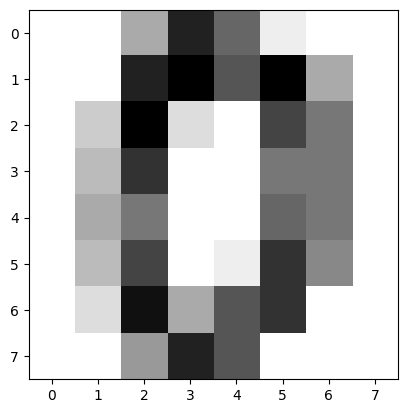

In [4]:
# ==============================================================
# VISUALIZACIÓN GRÁFICA DE LA IMAGEN
# ==============================================================

# Usamos matplotlib para mostrar la imagen como un mapa de calor
# cmap='binary' muestra la imagen en escala de grises (blanco y negro)
plt.imshow(image_sample, cmap='binary')

Now, using PCA, let’s reduce the image dimensions from 64 to just 2 so that we can visualize the dataset using a Scatterplot.

In [5]:
# ==============================================================
# APLICACIÓN DE PCA PARA REDUCCIÓN DE DIMENSIONALIDAD
# ==============================================================

# Importamos PCA de scikit-learn
from sklearn.decomposition import PCA

# Inicializamos PCA para reducir a 2 dimensiones (componentes principales)
# Esto nos permitirá visualizar los datos en un gráfico 2D
pca = PCA(2)

# fit_transform ajusta el modelo y transforma los datos en un solo paso
# Reducimos de 64 dimensiones (píxeles) a solo 2 dimensiones
converted_data = pca.fit_transform(digits.data)

# Verificamos la nueva forma: (1797 imágenes, 2 componentes principales)
converted_data.shape

(1797, 2)

In [6]:
# ==============================================================
# CÁLCULO DEL TAMAÑO ORIGINAL DE LOS DATOS
# ==============================================================

# Calculamos el número total de elementos en el dataset original
# 1797 imágenes × 64 píxeles = 115,008 valores
digits.data.size

115008

In [7]:
# ==============================================================
# CÁLCULO DEL TAMAÑO REDUCIDO DE LOS DATOS
# ==============================================================

# Calculamos el número total de elementos después de aplicar PCA
# 1797 imágenes × 2 componentes = 3,594 valores
converted_data.size

3594

In [8]:
# ==============================================================
# RATIO DE COMPRESIÓN
# ==============================================================

# Calculamos el ratio de compresión: cuánto espacio ocupan los datos reducidos
# vs los datos originales
# 3,594 / 115,008 = 0.03125 = 3.125%
# ¡Hemos reducido los datos a solo el 3.125% de su tamaño original!
converted_data.size/digits.data.size

0.03125

We can also pass a float value less than 1 instead of an integer number. i.e. PCA(0.90) this means the algorithm will find the principal components which explain 90% of the variance in data.

C:\Users\borja\AppData\Local\Temp\ipykernel_34240\2507048619.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


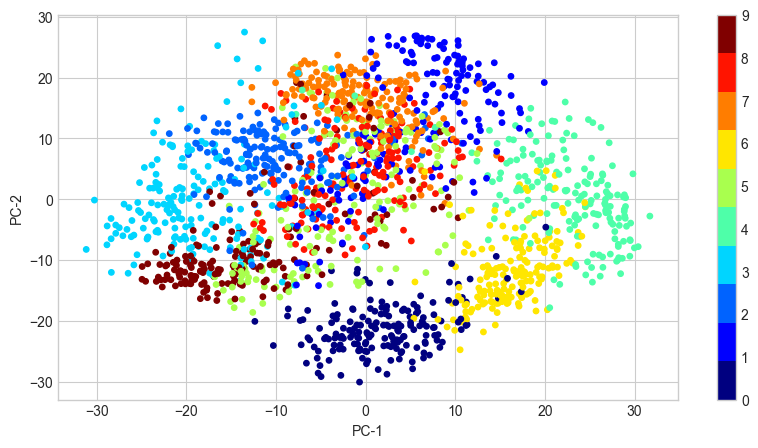

In [9]:
# ==============================================================
# VISUALIZACIÓN DE LOS DATOS REDUCIDOS EN 2D
# ==============================================================

# Configuramos el estilo del gráfico
plt.style.use('seaborn-v0_8-whitegrid')

# Creamos una figura de 10x5 pulgadas
plt.figure(figsize = (10,5))

# Definimos un mapa de colores con 10 colores (uno por cada dígito 0-9)
c_map = plt.cm.get_cmap('jet', 10)

# Creamos un scatter plot con las 2 componentes principales
# converted_data[:, 0] = primera componente (eje X)
# converted_data[:, 1] = segunda componente (eje Y)
# s = tamaño de los puntos
# c = color basado en la etiqueta del dígito (0-9)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)

# Añadimos una barra de colores para identificar los dígitos
plt.colorbar()

# Etiquetamos los ejes
plt.xlabel('PC-1') , plt.ylabel('PC-2')

# Mostramos el gráfico
plt.show();

Another cool application of PCA is in Image compression. Let’s have a look at how can we achieve this with python.

In [ ]:
#%pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ------ --------------------------------- 6.8/39.0 MB 34.9 MB/s eta 0:00:01
   --------------- ------------------------ 14.7/39.0 MB 35.8 MB/s eta 0:00:01
   ------------------------ --------------- 24.1/39.0 MB 39.3 MB/s eta 0:00:01
   --------------------------------- ------ 32.5/39.0 MB 39.4 MB/s eta 0:00:01
   ---------------------------------------  38.8/39.0 MB 39.5 MB/s eta 0:00:01
   ---------------------------------------- 39.0/39.0 MB 36.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------- ----------- 8.9/12.6 MB 44.2 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 39.2 MB/s eta 0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.0

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   -------------------------------------

  You can safely remove it manually.
  You can safely remove it manually.


In [10]:
# ==============================================================
# IMPORTACIÓN DE LIBRERÍAS PARA COMPRESIÓN DE IMÁGENES
# ==============================================================

# OpenCV: librería para procesamiento de imágenes
import cv2

# NumPy: operaciones con arrays
import numpy as np

# PCA: para la reducción de dimensionalidad
from sklearn.decomposition import PCA

In [11]:
# ==============================================================
# CARGA DE LA IMAGEN A COMPRIMIR
# ==============================================================

# Leemos la imagen desde el disco usando OpenCV
# OpenCV carga las imágenes en formato BGR (Blue, Green, Red)
img = cv2.imread('img/my_doggo_sample.jpeg')

# Mostramos el array resultante
# Es un array 3D: (altura, ancho, canales de color)
img

array([[[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [192, 216, 246],
        [193, 217, 248],
        [193, 217, 248]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [191, 215, 245],
        [192, 216, 246],
        [192, 216, 246]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [189, 213, 243],
        [190, 214, 244],
        [190, 214, 244]],

       ...,

       [[ 47,  63,  76],
        [ 30,  45,  56],
        [ 47,  63,  69],
        ...,
        [ 26,  51,  77],
        [ 29,  55,  79],
        [ 50,  76, 100]],

       [[ 46,  62,  75],
        [ 18,  35,  46],
        [ 29,  45,  52],
        ...,
        [ 40,  67,  95],
        [ 40,  68,  93],
        [ 48,  77, 100]],

       [[ 32,  48,  61],
        [ 17,  34,  45],
        [ 20,  36,  42],
        ...,
        [ 47,  74, 102],
        [ 43,  73,  98],
        [ 48,  79, 103]]

In [12]:
# ==============================================================
# VERIFICACIÓN DEL CONTENIDO DE LA IMAGEN
# ==============================================================

# Mostramos nuevamente el array de la imagen
# Cada píxel tiene 3 valores: [Blue, Green, Red] en rango 0-255
img

array([[[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [192, 216, 246],
        [193, 217, 248],
        [193, 217, 248]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [191, 215, 245],
        [192, 216, 246],
        [192, 216, 246]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [189, 213, 243],
        [190, 214, 244],
        [190, 214, 244]],

       ...,

       [[ 47,  63,  76],
        [ 30,  45,  56],
        [ 47,  63,  69],
        ...,
        [ 26,  51,  77],
        [ 29,  55,  79],
        [ 50,  76, 100]],

       [[ 46,  62,  75],
        [ 18,  35,  46],
        [ 29,  45,  52],
        ...,
        [ 40,  67,  95],
        [ 40,  68,  93],
        [ 48,  77, 100]],

       [[ 32,  48,  61],
        [ 17,  34,  45],
        [ 20,  36,  42],
        ...,
        [ 47,  74, 102],
        [ 43,  73,  98],
        [ 48,  79, 103]]

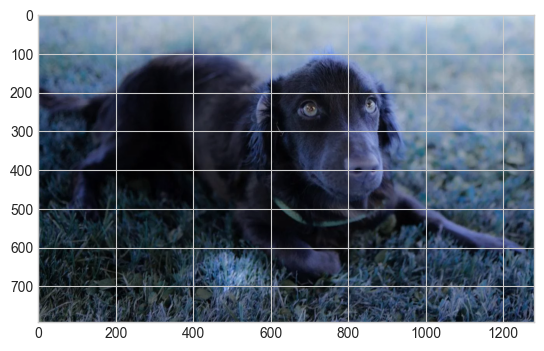

In [13]:
# ==============================================================
# VISUALIZACIÓN DIRECTA DE LA IMAGEN (COLORES INCORRECTOS)
# ==============================================================

# PROBLEMA: matplotlib espera RGB, pero OpenCV carga en BGR
# Por eso la imagen se ve con colores incorrectos (azules en lugar de rojos)
plt.imshow(img);

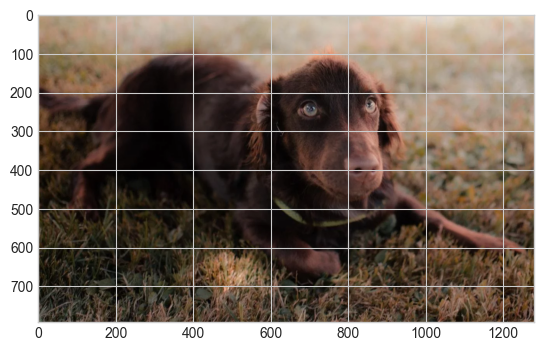

In [14]:
# ==============================================================
# CONVERSIÓN DE BGR A RGB PARA VISUALIZACIÓN CORRECTA
# ==============================================================

# Convertimos la imagen de BGR (OpenCV) a RGB (matplotlib)
# cv2.COLOR_BGR2RGB invierte el orden de los canales de color
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ahora la imagen se muestra con los colores correctos
plt.imshow(rgb_image);

In [15]:
# ==============================================================
# DIMENSIONES DE LA IMAGEN
# ==============================================================

# Verificamos las dimensiones de la imagen
# (793 píxeles de alto, 1280 píxeles de ancho, 3 canales de color)
img.shape

(793, 1280, 3)

In [16]:
# ==============================================================
# NÚMERO TOTAL DE ELEMENTOS EN LA IMAGEN
# ==============================================================

# Calculamos el número total de valores en la imagen
# 793 × 1280 × 3 = 3,045,120 valores
# Cada canal de color necesita almacenar 793×1280 valores
img.size

3045120

In [17]:
# ==============================================================
# NÚMERO DE PÍXELES POR CANAL
# ==============================================================

# Calculamos cuántos píxeles hay en cada canal de color
# 793 × 1280 = 1,015,040 píxeles por canal
793*1280

1015040

In [18]:
img

array([[[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [192, 216, 246],
        [193, 217, 248],
        [193, 217, 248]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [191, 215, 245],
        [192, 216, 246],
        [192, 216, 246]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [189, 213, 243],
        [190, 214, 244],
        [190, 214, 244]],

       ...,

       [[ 47,  63,  76],
        [ 30,  45,  56],
        [ 47,  63,  69],
        ...,
        [ 26,  51,  77],
        [ 29,  55,  79],
        [ 50,  76, 100]],

       [[ 46,  62,  75],
        [ 18,  35,  46],
        [ 29,  45,  52],
        ...,
        [ 40,  67,  95],
        [ 40,  68,  93],
        [ 48,  77, 100]],

       [[ 32,  48,  61],
        [ 17,  34,  45],
        [ 20,  36,  42],
        ...,
        [ 47,  74, 102],
        [ 43,  73,  98],
        [ 48,  79, 103]]

In [19]:
# ==============================================================
# SEPARACIÓN DE LA IMAGEN EN CANALES BGR
# ==============================================================

# Separamos la imagen en sus 3 canales individuales
# cv2.split devuelve 3 arrays 2D, uno por cada canal de color
blue, green, red = cv2.split(img)

# Ahora tenemos:
# - blue: matriz de 793×1280 con intensidades del canal azul
# - green: matriz de 793×1280 con intensidades del canal verde  
# - red: matriz de 793×1280 con intensidades del canal rojo

In [20]:
# ==============================================================
# VERIFICACIÓN DE LA FORMA DE UN CANAL INDIVIDUAL
# ==============================================================

# Comprobamos las dimensiones del canal azul
# Ahora es 2D: (793, 1280) - ha desaparecido la tercera dimensión
blue.shape

(793, 1280)

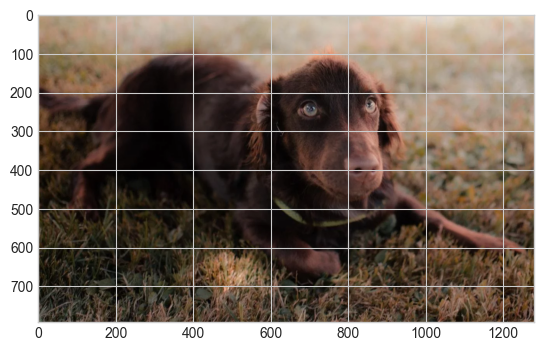

In [21]:
# ==============================================================
# RECOMBINACIÓN DE CANALES (ORDEN INCORRECTO - COLORES INCORRECTOS)
# ==============================================================

# Intentamos recombinar los canales en orden [red, green, blue]
# PROBLEMA: OpenCV espera BGR, no RGB
img_not_compressed = cv2.merge([red,green,blue])

# La imagen se verá con colores invertidos porque estamos
# poniendo red donde debería ir blue y viceversa
plt.imshow(img_not_compressed);

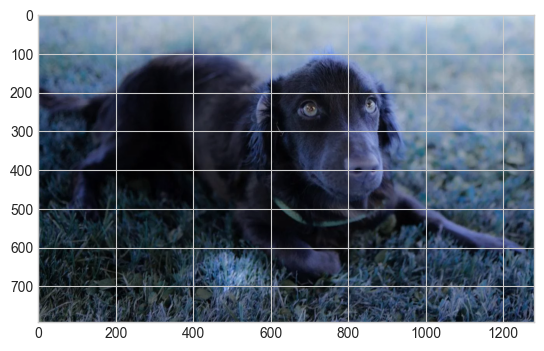

In [22]:
# ==============================================================
# RECOMBINACIÓN DE CANALES (ORDEN CORRECTO - BGR)
# ==============================================================

# Ahora recombinamos en el orden correcto para OpenCV: [blue, green, red]
img_not_compressed = cv2.merge([blue, green, red])

# Esta es la imagen original sin comprimir, reconstituida
# Se ve con colores azulados porque matplotlib espera RGB pero tenemos BGR
plt.imshow(img_not_compressed);

OpenCV will split into Blue, Green, and Red channels instead of Red, Blue, and Green. Be very careful of the sequence here.

In [23]:
# ==============================================================
# APLICACIÓN DE PCA A CADA CANAL DE COLOR
# ==============================================================

# Inicializamos PCA con 20 componentes principales
# Esto reducirá las 1280 columnas a solo 20 componentes por fila
pca = PCA(20)
 
# CANAL ROJO:
# 1. fit_transform: ajusta PCA y transforma de (793, 1280) a (793, 20)
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)

# 2. inverse_transform: reconstruye de vuelta a (793, 1280)
#    Pero ahora con información reducida (solo 20 componentes)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

# CANAL VERDE:
# Repetimos el mismo proceso para el canal verde
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
# CANAL AZUL:
# Repetimos el mismo proceso para el canal azul
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

# IMPORTANTE: En el proceso de reducción y reconstrucción se pierde información
# porque solo mantenemos 20 componentes principales de los 1280 originales

red_transformed.shape: (793, 20)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 20)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 20)
blue_inverted.shape: (793, 1280)


In the process of reconstructing the original dimensions from the reduced dimensions, some information is lost as we keep only selected principal components, 20 in this case.

In [24]:
# ==============================================================
# RECONSTRUCCIÓN DE LA IMAGEN COMPRIMIDA
# ==============================================================

# Combinamos los 3 canales invertidos en una sola imagen
# cv2.merge recombina los arrays 2D en un array 3D
# .astype(np.uint8) convierte los valores a enteros de 8 bits (0-255)
# Esto es necesario porque inverse_transform devuelve valores float
img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

Stacking the inverted arrays using dstack function. Here it is important to specify the datatype of our arrays, as most images are of 8 bit. Each pixel is represented by one 8-bit byte.

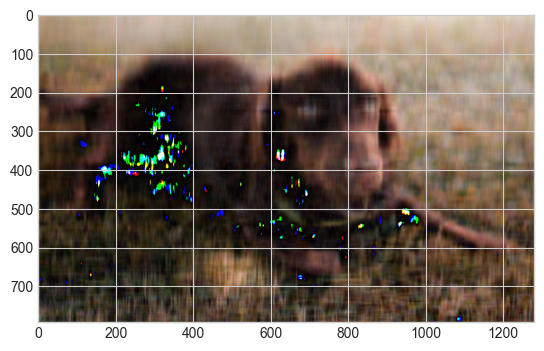

In [25]:
# ==============================================================
# VISUALIZACIÓN DE LA IMAGEN COMPRIMIDA CON 20 COMPONENTES
# ==============================================================

# Mostramos la imagen comprimida
# Se verá más borrosa que la original porque hemos perdido información
# al reducir de 1280 a 20 componentes principales
plt.imshow(img_compressed);

The output above is what we get when considering just 20 Principal components.

If we increase the number of Principal components the output image will get clear.

1) Now check with how many Principal Components your eyes can't see the difference with the original!

2) The dog should not be so blue, fix it!

red_transformed.shape: (793, 250)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 250)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 250)
blue_inverted.shape: (793, 1280)


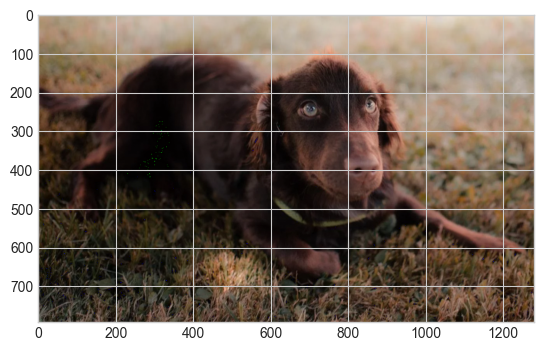

In [26]:
# ==============================================================
# EXPERIMENTO: COMPRESIÓN CON MÁS COMPONENTES PRINCIPALES
# ==============================================================

# Ahora probamos con 250 componentes principales (en lugar de 20)
# Esto debería dar una imagen de mayor calidad
pca = PCA(250)
 
# Aplicamos el mismo proceso a los 3 canales
# CANAL ROJO:
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

# CANAL VERDE:
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
# CANAL AZUL:
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

# Reconstruimos la imagen comprimida con 250 componentes
img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

# Visualizamos el resultado
# Debería verse mucho más nítida que con solo 20 componentes
plt.imshow(img_compressed);

In [27]:
# ==============================================================
# VARIANZA EXPLICADA ACUMULADA POR CADA COMPONENTE
# ==============================================================

# Esta función muestra cuánta varianza (información) del dataset original
# se retiene con cada componente principal adicional
# 
# Por ejemplo:
# - Con 1 componente: ~72% de la información
# - Con 2 componentes: ~85% de la información
# - Con 20 componentes: ~96% de la información
# - Con 250 componentes: ~99.97% de la información
#
# Esto nos ayuda a decidir cuántos componentes necesitamos para
# lograr un balance entre compresión y calidad
pca.explained_variance_ratio_.cumsum()

array([0.71914516, 0.84908078, 0.87286237, 0.88844408, 0.89865226,
       0.90765092, 0.91383793, 0.91975685, 0.9250571 , 0.9297264 ,
       0.933692  , 0.93751202, 0.94103888, 0.94404696, 0.94677529,
       0.94935898, 0.95170765, 0.95398267, 0.95603986, 0.9579354 ,
       0.95980251, 0.96157869, 0.96316876, 0.96467165, 0.96613913,
       0.96749861, 0.96879963, 0.97007384, 0.97123758, 0.97233711,
       0.97340584, 0.974405  , 0.97537922, 0.97628754, 0.97715436,
       0.97796994, 0.97875348, 0.97952903, 0.98026559, 0.98095624,
       0.98161481, 0.98224925, 0.98284966, 0.98343271, 0.98398928,
       0.98450207, 0.98499793, 0.98547484, 0.98593405, 0.98637935,
       0.9868111 , 0.98723624, 0.98763407, 0.98802932, 0.98839627,
       0.98875005, 0.98909782, 0.9894282 , 0.98973969, 0.99004701,
       0.99034098, 0.99062507, 0.9909028 , 0.99117515, 0.99143564,
       0.99168259, 0.99192426, 0.99215462, 0.99237763, 0.99259952,
       0.992815  , 0.99301592, 0.99320767, 0.9933938 , 0.99357